In [7]:
# EDA 1
import pandas as pd
df=pd.read_csv('C:/Users/saura/Downloads/BIKE DETAILS.csv')

# Exploring database
df.head(1)
df.dtypes


name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [12]:
# 1 What is the range of selling prices in the dataset?
import numpy as np
sp_range = df['selling_price'].max()-df['selling_price'].min()
sp_range

np.int64(755000)

In [4]:
# 2 What is the median selling price for bikes in the dataset?
median=df['selling_price'].median()
median
df.head(2)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN


In [2]:
# 3 What is the most common seller type?
import statistics 
most_common_seller=statistics.mode(df['seller_type'])
most_common_seller

'Individual'

In [5]:
# 4 How many bikes have driven more than 50,000 kilometers?
bikes_driven_more_than_50000=df[df['km_driven']>50000]['name'].count()
bikes_driven_more_than_50000


np.int64(170)

In [16]:
# 5 What is the average km_driven value for each ownership type?
avg_km_driven = df.groupby('owner')['km_driven'].mean()
avg_km_driven

                 

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [17]:
# 6.What proportion of bikes are from the year 2015 or older?

# Correcting the condition to check for 2015 or older
bikes_older_than_2015 = df[df['year'] <= 2015]

# Counting the number of bikes from 2015 or older
count_bikes_older_than_2015 = bikes_older_than_2015.shape[0]

# Calculating the total number of bikes
total_bikes = df.shape[0]

# Calculating the proportion
proportion_bikes_older_than_2015 = count_bikes_older_than_2015 / total_bikes

print("Proportion of bikes from the year 2015 or older:", proportion_bikes_older_than_2015)


Proportion of bikes from the year 2015 or older: 0.5664467483506126


In [8]:
# 7 What is the trend of missing values across the dataset?
missing_values=df.isnull().sum()
missing_values



name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [102]:
# 8 What is the highest ex_showroom_price recorded, and for which bike?
df.head()
import warnings
warnings.filterwarnings('ignore')
# Convert ex_showroom_price to numeric, handling errors
df['ex_showroom_price'] = pd.to_numeric(df['ex_showroom_price'], errors='coerce')

# Calculate the highest ex-showroom price
highest_ex_showroom_price = df['ex_showroom_price'].max()

# Replace null values with mean
df['ex_showroom_price'].fillna(df['ex_showroom_price'].mean(), inplace=True)

# Find the bike with the highest ex-showroom price
bike_with_highest_price = df[df['ex_showroom_price'] == highest_ex_showroom_price]['name'].iloc[0]

# Display the results
print(f"Highest ex-showroom price: {highest_ex_showroom_price}")
print(f"Bike with the highest ex-showroom price: {bike_with_highest_price}")


Highest ex-showroom price: 1278000.0
Bike with the highest ex-showroom price: Harley-Davidson Street Bob


In [10]:
# 9 What is the total number of bikes listed by each seller type?
df.groupby('seller_type')['name'].count()

seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64

In [11]:
# 10 What is the relationship between selling_price and km_driven for first-owner bikes?
df[df['owner'] == '1st owner'][['selling_price', 'km_driven']].corr()


,selling_price,km_driven
selling_price,1.000000,-0.243482
km_driven,-0.243482,1.000000


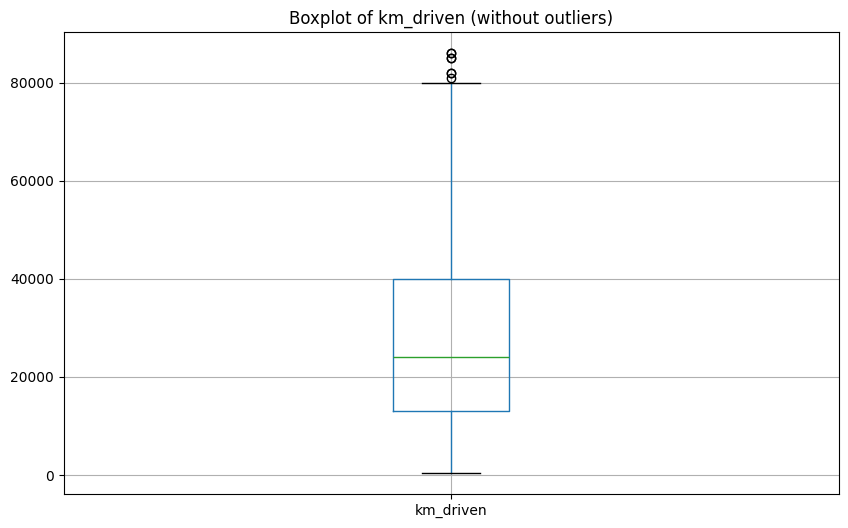

In [22]:
#11 Identify and remove outliers in the km_driven column using the IQR method.
import matplotlib.pyplot as plt
q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
IQR=q3-q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
# Plot the boxplot for the km_driven column without outliers
plt.figure(figsize=(10, 6))
df_no_outliers.boxplot(column='km_driven')
plt.title('Boxplot of km_driven (without outliers)')
plt.show()

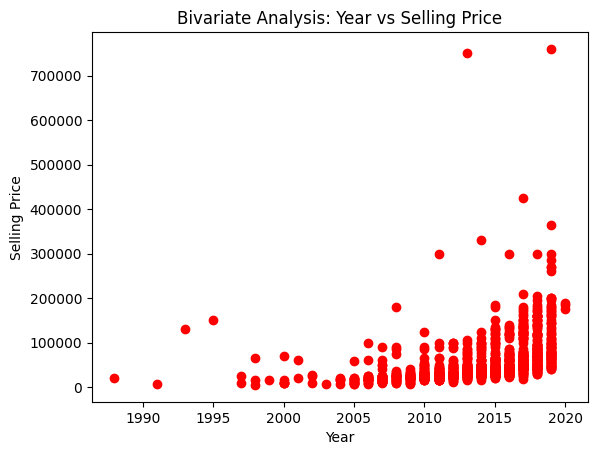

In [32]:
# 12  Perform a bivariate analysis to visualize the relationship between year and selling_price
import matplotlib.pyplot as plt
plt.scatter(x=df['year'], y=df['selling_price'],c='red') 
# Adding labels and title for better clarity 
plt.xlabel('Year') 
plt.ylabel('Selling Price') 
plt.title('Bivariate Analysis: Year vs Selling Price') 
plt.show()# Display plot

In [38]:
# 13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

import pandas as pd

# Current year
current_year = 2024

# Calculate the age of each bike
df['age'] = current_year - df['year']

# Calculate the depreciation for each bike (Depreciation = Ex-Showroom Price - Selling Price)
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

# Drop rows where ex_showroom_price, selling_price, or depreciation is NaN
df = df.dropna(subset=['ex_showroom_price', 'selling_price', 'depreciation'])

# calculate the average depreciation based on bike age
# Group by age and calculate average depreciation for each age group
import warnings
warnings.filterwarnings('ignore')
age_depreciation = df.groupby('age')['depreciation'].mean()
age_depreciation



age
4    -34260.000000
5      2954.562500
6     13023.194805
7     22306.082353
8     28328.190476
9     28013.275000
10    34505.606061
11    43086.886792
12    37317.648649
13    47102.666667
14    45658.928571
15    38227.785714
16    54732.428571
17    42399.000000
18    39664.500000
19    44852.000000
20    36852.000000
23    34852.000000
Name: depreciation, dtype: float64

In [33]:
df.head(1)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN


In [45]:
# 14 Which bike names are priced significantly above the average price
# for their manufacturing year

# Calculate the average selling price for each year
year_avg_price = df.groupby('year')['selling_price'].mean().reset_index()
year_avg_price.columns = ['year', 'avg_selling_price']

# Merge the average selling price with the original DataFrame
df = pd.merge(df, year_avg_price, on='year')

# Identify bikes priced above the average for their manufacturing year
significantly_above_avg = df[df['selling_price'] > df['avg_selling_price']]

# Show the names of these bikes
bike_names_above_avg = significantly_above_avg['name'].tolist()

print("Bikes priced significantly above the average price for their manufacturing year:")
print(bike_names_above_avg)


Bikes priced significantly above the average price for their manufacturing year:
['Royal Enfield Classic Gunmetal Grey', 'Yamaha Fazer FI V 2.0 [2016-2018]', 'Yamaha YZF R3', 'Yamaha YZF R15 S', 'Royal Enfield Classic Gunmetal Grey', 'Yamaha FZ25', 'Honda CBR-250R', 'Yamaha FZ16', 'Yamaha FZ16', 'Hero Xtreme Sports', 'Honda CB Hornet 160R', 'Mahindra Mojo XT300', 'Bajaj Pulsar AS200', 'Royal Enfield Thunderbird 350X', 'Honda CB Unicorn 150', 'Royal Enfield Classic Gunmetal Grey', 'Yamaha FZ25', 'Royal Enfield Classic Desert Storm', 'Yamaha FZ25', 'UM Renegade Commando', 'Royal Enfield Classic Gunmetal Grey', 'Honda Activa 3G', 'Harley-Davidson Street Bob', 'KTM 390 Duke ABS [2013-2016]', 'Honda CB Hornet 160R', 'Royal Enfield Classic 500', 'Suzuki Gixxer [2014-2018]', 'Royal Enfield Classic Desert Storm', 'Honda CB Unicorn 160', 'Bajaj Pulsar 180', 'Honda CB Unicorn 150', 'Yamaha YZF R15 [2011-2018]', 'Bajaj Pulsar AS200', 'Bajaj Pulsar 180', 'Bajaj Pulsar 180', 'Royal Enfield Bullet 5

<Figure size 1000x800 with 0 Axes>

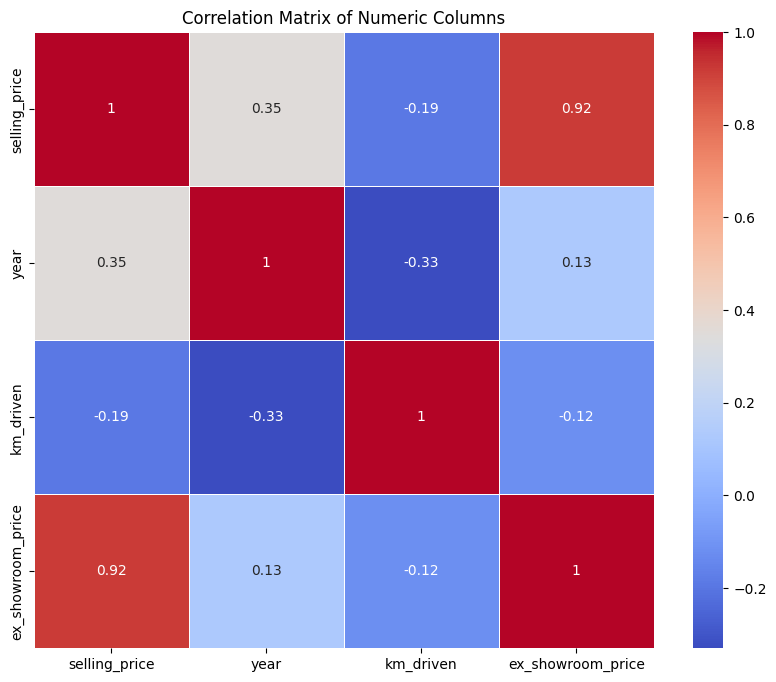

In [44]:
# 15 Develop a correlation matrix for numeric columns and 
# visualize it using a heatmap

# Calculate the correlation matrix
import seaborn as sns
corr_matrix = df[['selling_price', 'year', 'km_driven', 'ex_showroom_price']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()



In [40]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,depreciation,avg_selling_price
0,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,6,-1886.0,87837.662338
1,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,9,24643.0,54550.000000
2,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0,14,35857.0,32057.142857
3,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0,6,9219.0,87837.662338
4,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0,8,10122.0,53597.440476


In [32]:
# EDA - 2
# Title: Car Sale Dataset
import pandas as pd 
df=pd.read_csv('C:/Users/saura/Downloads/Car Sale.csv')
df.head(1)




,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown


Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, "Buddy Storbeck's Diesel Service Inc"),
  Text(1, 0, 'C & M Motors Inc'),
  Text(2, 0, 'Capitol KIA'),
  Text(3, 0, 'Chrysler Plymouth'),
  Text(4, 0, 'Chrysler of Tri-Cities'),
  Text(5, 0, 'Classic Chevy'),
  Text(6, 0, 'Clay Johnson Auto Sales'),
  Text(7, 0, 'Diehl Motor CO Inc'),
  Text(8, 0, 'Enterprise Rent A Car'),
  Text(9, 0, 'Gartner Buick Hyundai Saab'),
  Text(10, 0, 'Hatfield Volkswagen'),
  Text(11, 0, 'Iceberg Rentals'),
  Text(12, 0, 'McKinney Dodge Chrysler Jeep'),
  Text(13, 0, 'Motor Vehicle Branch Office'),
  Text(14, 0, 'Nebo Chevrolet'),
  Text(15, 0, 'New Castle Ford Lincoln Mercury'),
  Text(16, 0, 'Pars Auto Sales'),
  Text(17, 0, 'Pitre Buick-Pontiac-Gmc of Scottsdale'),
  Text(18, 0, 'Progressive Shippers Cooperative Association No'),
  Text(19, 0, 'Rabun Used Car Sales'),
  Text(20, 0, 'Race Car Help'),
  Text(21, 0,

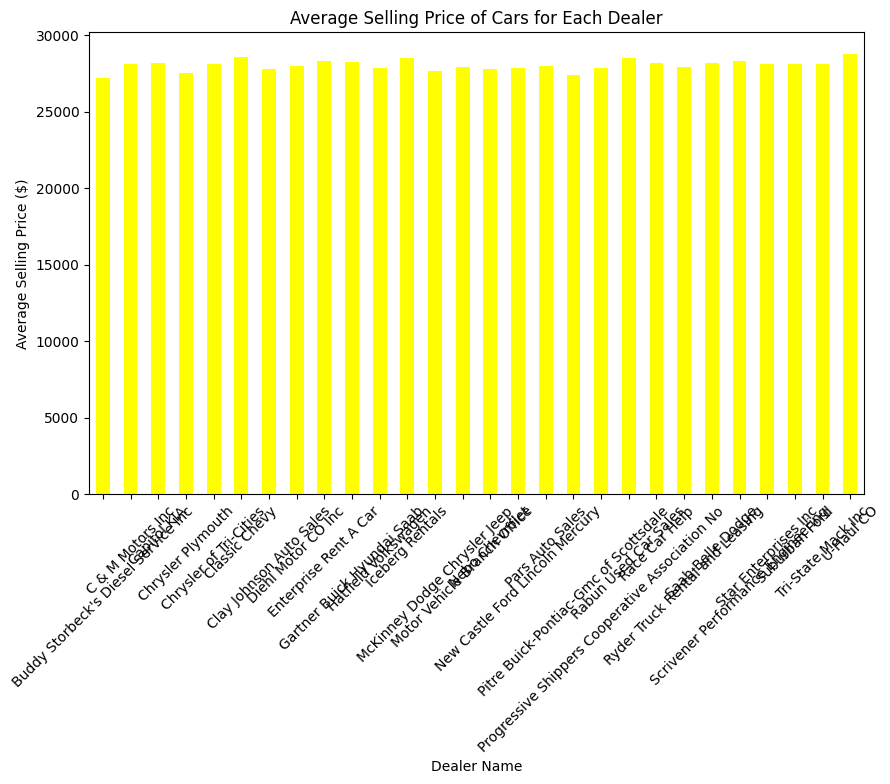

In [2]:
# 1 What is the average selling price of cars for each dealer, 
# and how does it compare across different dealers?
avg_sp_dealer=df.groupby('Dealer_Name')['Price ($)'].mean()
print(avg_sp_dealer)

#(showing using bar plot compare across different dealers)
import matplotlib.pyplot as plt 
avg_sp_dealer.plot(kind='bar', figsize=(10, 6), color='yellow')
plt.xlabel('Dealer Name') 
plt.ylabel('Average Selling Price ($)') 
plt.title('Average Selling Price of Cars for Each Dealer') 
plt.xticks(rotation=45)


The company with the highest price variance is Lincoln with a variance of 386438938.11


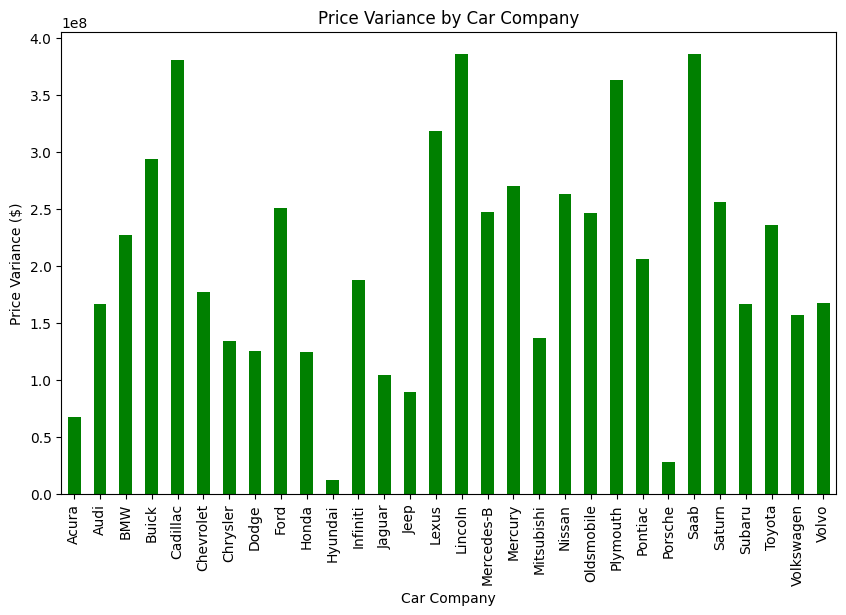

In [17]:
# 2 Which car brand (Company) has the highest variation in prices, 
# and what does this tell us about the pricing trends 
import matplotlib.pyplot as plt

# Calculate the variance in price per company
price_variance = df.groupby('Company')['Price ($)'].var()

# Identify the company with the highest variance
max_variance_company = price_variance.idxmax()  # Company with the highest price variance
max_variance_value = price_variance.max()  # The actual variance value for the company

# Print the company with the highest price variance
print(f"The company with the highest price variance is {max_variance_company} with a variance of {max_variance_value:.2f}")

# Plot the price variance for all companies
price_variance.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Price Variance by Car Company')
plt.xlabel('Car Company')
plt.ylabel('Price Variance ($)')
plt.show()


Interquartile Range (IQR) for each transmission type:
Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


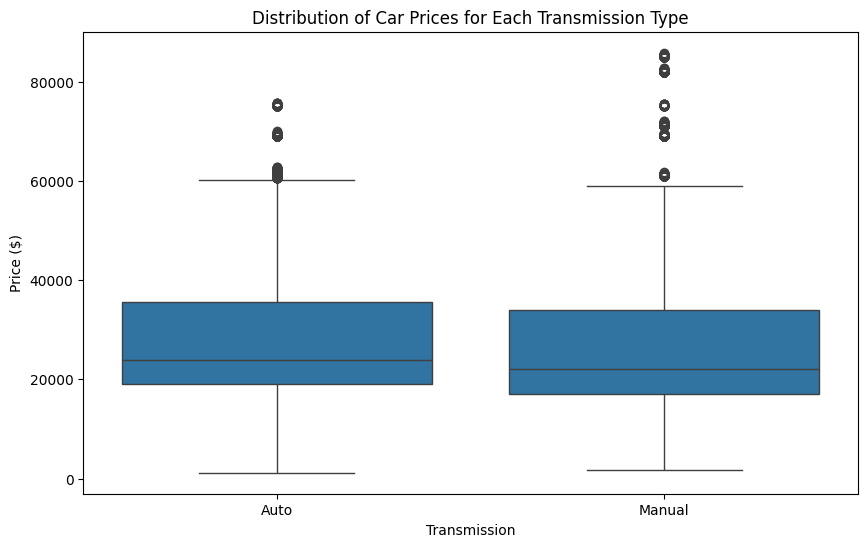

In [47]:
# 3 What is the distribution of car prices for each transmission type, 
# and how do the interquartile ranges compare?
carprice_each_trasmission=df.groupby('Transmission')['Price ($)'].count()
carprice_each_trasmission


import seaborn as sns

# Calculate the IQR for each transmission type
iqr = df.groupby('Transmission')['Price ($)'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

print("\nInterquartile Range (IQR) for each transmission type:")
print(iqr)

# Visualize the distribution using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)',data=df)
plt.title('Distribution of Car Prices for Each Transmission Type')
plt.show()


In [49]:
# 4 What is the distribution of car prices across different regions?
car_cp_across_different_regions=df.groupby('Dealer_Region')['Price ($)'].value_counts()
car_cp_across_different_regions

Dealer_Region  Price ($)
Aurora         22000        155
               19000        127
               21000        122
               26000         96
               18000         81
                           ... 
Scottsdale     71210          1
               71580          1
               71990          1
               82500          1
               82750          1
Name: count, Length: 2447, dtype: int64

In [25]:
df.head(1)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown


In [31]:
# 5 What is the distribution of cars based on body styles?
df.groupby('Company')['Body Style'].value_counts()

Company  Body Style
Acura    SUV           372
         Hatchback     269
         Passenger      48
Audi     SUV           348
         Hardtop        70
                      ... 
Volvo    Sedan         368
         Hatchback     228
         Hardtop       104
         SUV            48
         Passenger      41
Name: count, Length: 126, dtype: int64

Average car price by Gender:
Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64

Average car price by Annual Income:
Annual Income
10080       22801.000000
13500       27878.981415
24000       61001.000000
85000       43000.000000
106000      46001.000000
                ...     
6600000     39000.000000
6800000     15000.000000
7650000     21000.000000
8000000     85000.000000
11200000    26001.000000
Name: Price ($), Length: 2508, dtype: float64


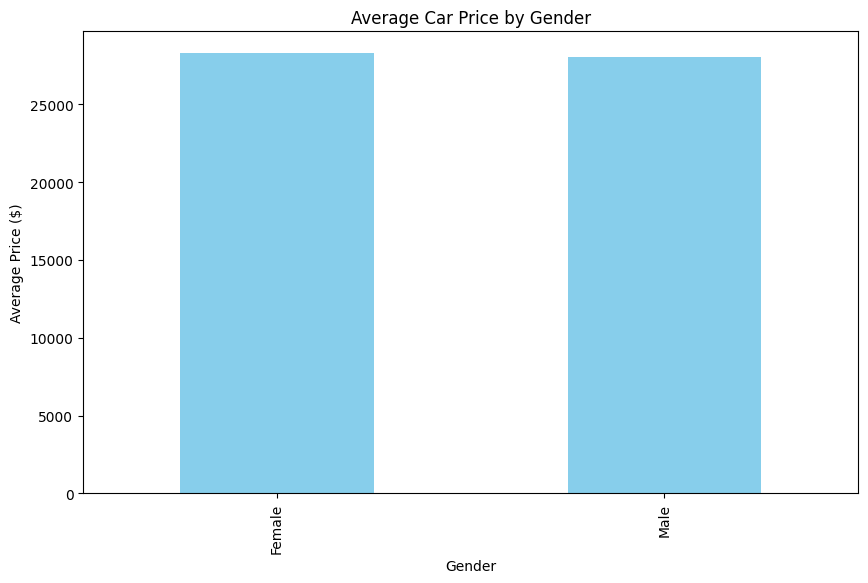

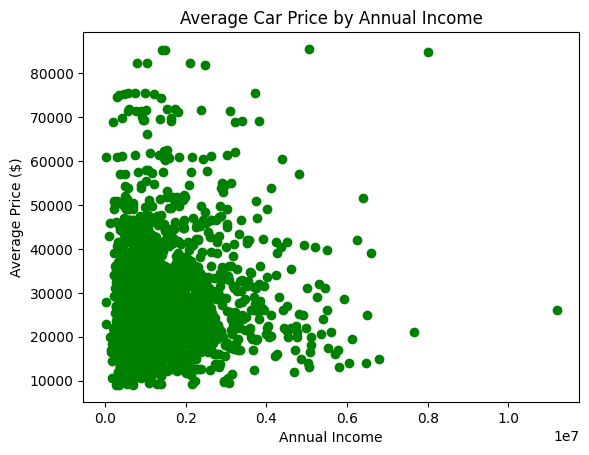

In [15]:
#  6 How does the average selling price of cars vary by customer gender and annual income?

# Calculate the average price of cars by customer gender
avg_price_by_gender = df.groupby('Gender')['Price ($)'].mean()

# Calculate the average price of cars by customer annual income
avg_price_by_income = df.groupby('Annual Income')['Price ($)'].mean()

# Print the results
print("Average car price by Gender:")
print(avg_price_by_gender)
print("\nAverage car price by Annual Income:")
print(avg_price_by_income)

# Plot the results
# Plot average price by Gender
plt.figure(figsize=(10, 6))
avg_price_by_gender.plot(kind='bar', color='skyblue')
plt.title('Average Car Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Price ($)')
plt.show()


plt.scatter(avg_price_by_income.index, avg_price_by_income, color='green')
plt.title('Average Car Price by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Price ($)')
plt.show()


In [33]:
# 7 What is the distribution of car prices by region, and how does the number of cars sold vary by region?
distribution_of_car_prices_by_region =df.groupby('Dealer_Region')['Price ($)'].describe()
distribution_of_car_prices_by_region



,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


In [28]:
# 7.1 how does the number of cars sold vary by region?
df.head(1)
df['Dealer_Region'].value_counts()

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64

In [36]:
# 8 How does the average car price differ between cars with different engine sizes?
df.groupby('Engine')['Price ($)'].mean()


Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64

In [42]:
# 9 How do car prices vary based on the customer’s annual income bracket?
df.groupby('Annual Income')['Price ($)'].value_counts()


Annual Income  Price ($)
10080          22801          1
13500          22000        306
               19000        269
               21000        216
               26000        190
                           ... 
6600000        39000          1
6800000        15000          1
7650000        21000          1
8000000        85000          1
11200000       26001          1
Name: count, Length: 13908, dtype: int64

Model
Bravada    11200000
S-Class     8000000
Sonata      7650000
323i        6800000
Sable       6600000
Name: Annual Income, dtype: int64


<Axes: xlabel='Model'>

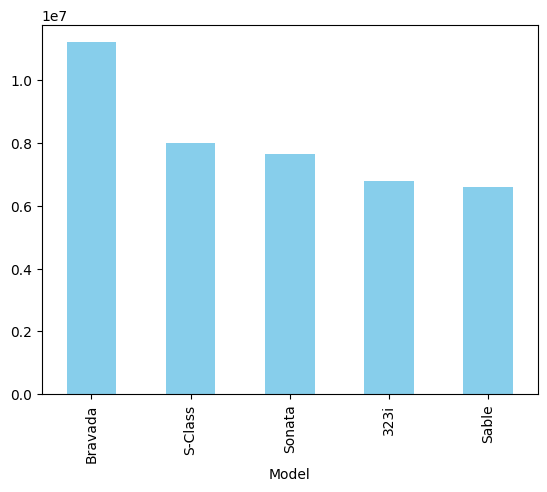

In [57]:
# 10 What are the top 5 car models with the highest number of sales, 
# and how does their price distribution look?
top_5_models_by_income = df.groupby('Model')['Annual Income'].max().sort_values(ascending=False).head(5)
print(top_5_models_by_income)

# Visualize the price distribution for the top 5 car models
top_5_models_by_income.plot(kind='bar', color='skyblue')


Average car price by Engine Size and Color:
Color                             Black    Pale White           Red
Engine                                                             
DoubleÂ Overhead Camshaft  25766.451103  30347.987460  27434.392314
Overhead Camshaft          31732.967164  24327.767694  30153.405229


<Figure size 1200x800 with 0 Axes>

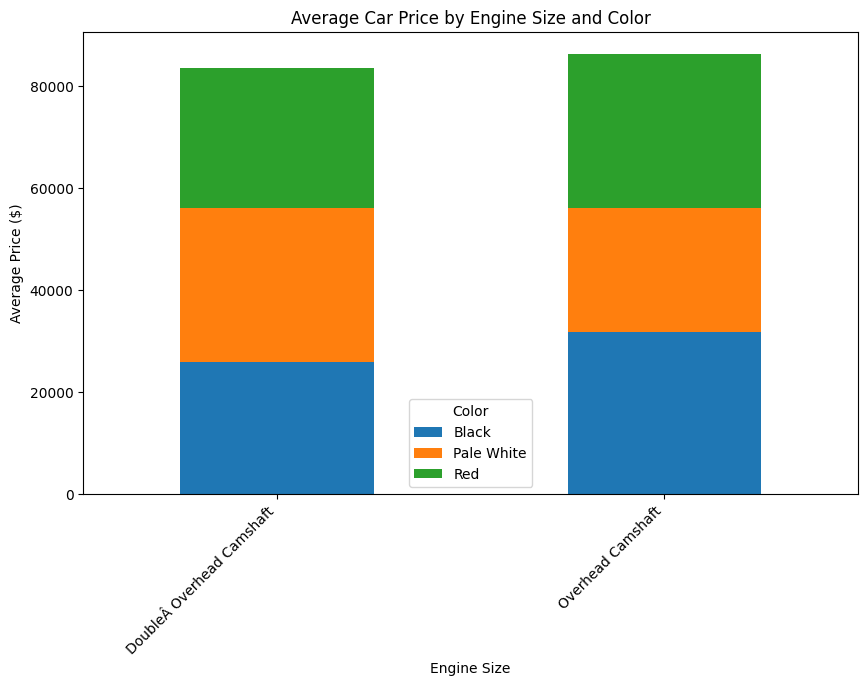


Price Variance by Color:
Color
Black         2.336638e+08
Pale White    1.981717e+08
Red           2.408506e+08
Name: Price ($), dtype: float64

The color with the highest price variation is Red with a variance of 240850564.68


In [58]:
# 11  How does car price vary with engine size across different car colors, 
# and which colors have the highest price variation?

import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is stored in the dataframe df

# Group the data by engine size and color to calculate the average price
avg_price_by_engine_color = df.groupby(['Engine', 'Color'])['Price ($)'].mean().unstack()

# Print the average price by engine size and color
print("Average car price by Engine Size and Color:")
print(avg_price_by_engine_color)

# Plot the average price by engine size and color
plt.figure(figsize=(12, 8))
avg_price_by_engine_color.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Average Car Price by Engine Size and Color')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate the price variance by color to find which color has the highest price variation
price_variance_by_color = df.groupby('Color')['Price ($)'].var()

# Print the price variance by color
print("\nPrice Variance by Color:")
print(price_variance_by_color)

# Identify the color with the highest price variance
highest_variance_color = price_variance_by_color.idxmax()
highest_variance_value = price_variance_by_color.max()

# Print the color with the highest price variance
print(f"\nThe color with the highest price variation is {highest_variance_color} with a variance of {highest_variance_value:.2f}")
##########



In [59]:
# 12 Is there any seasonal trend in car sales based on the date of sale?
df.head(1)
import pandas as pd
df['date']=pd.to_datetime(df['Date'])
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
# Group data by month and year and count sales
monthly_sales = df.groupby(['Year', 'Month'])['Price ($)'].count().reset_index()
monthly_sales

,Year,Month,Price ($)
0,2022,1,315
1,2022,2,320
2,2022,3,705
3,2022,4,800
4,2022,5,750
5,2022,6,690
6,2022,7,700
7,2022,8,810
8,2022,9,1475
9,2022,10,835


C:\Users\saura\AppData\Local\Temp\ipykernel_22740\1887521693.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Body_Transmission', y='Price ($)', data=df, palette='Set3')


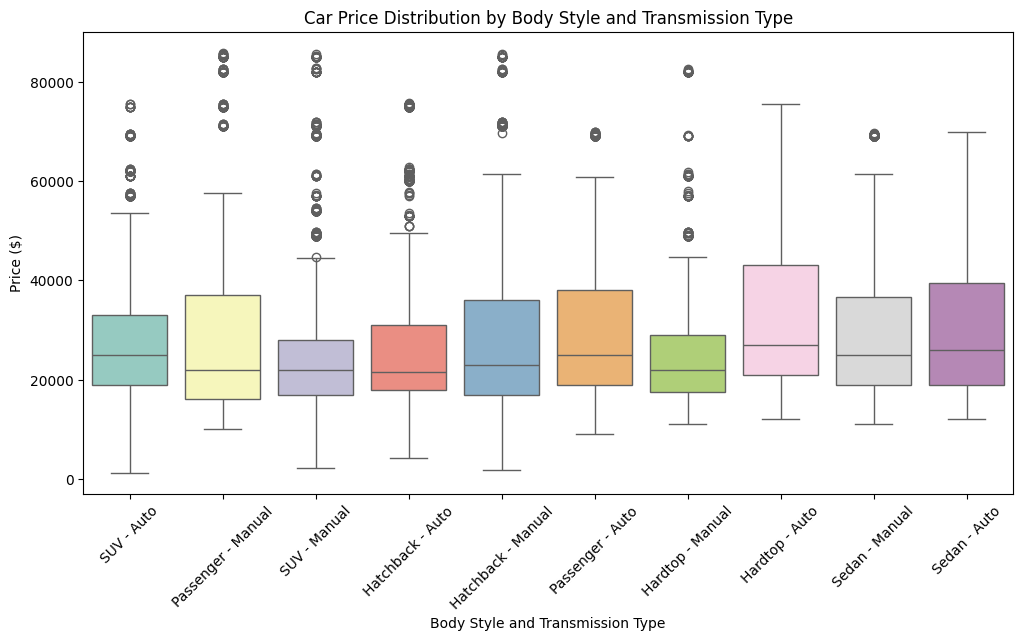

In [37]:
# 13 How does the car price distribution change when considering different combinations of body style and transmission type?

import seaborn as sns
df['Body_Transmission'] = df['Body Style'] + ' - ' + df['Transmission'] # Visualize the car price distribution by Body Style and Transmission using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body_Transmission', y='Price ($)', data=df, palette='Set3')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style and Transmission Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
features = df[['Price ($)', 'Engine','Annual Income']]  # Assuming 'AnnualIncome' exists

# converting object dtype to numerical dtype
df['Engine'] = df['Engine'].map({'Overhead Camshaft': 0, 'Double Overhead Camshaft': 1})

df_encoded = pd.get_dummies(df, columns=['Engine'])
# Calculate correlation matrix
correlation_matrix = features.corr()
correlation_matrix 

,Price ($),Engine,Annual Income
Price ($),1.000000,NaN,0.012065
Engine,NaN,NaN,NaN
Annual Income,0.012065,NaN,1.000000


In [45]:
features

,Price ($),Engine,Annual Income
0,26000,DoubleÂ Overhead Camshaft,13500
1,19000,DoubleÂ Overhead Camshaft,1480000
2,31500,Overhead Camshaft,1035000
3,14000,Overhead Camshaft,13500
4,24500,DoubleÂ Overhead Camshaft,1465000
...,...,...,...
23901,12000,Overhead Camshaft,13500
23902,16000,DoubleÂ Overhead Camshaft,900000
23903,21000,Overhead Camshaft,705000
23904,31000,DoubleÂ Overhead Camshaft,13500


In [52]:
#15 How does the average car price vary across different car models and engine types?

average_price_by_model_engine = df.groupby(['Model','Engine'])['Price ($)'].mean()

# Display the results
print(average_price_by_model_engine)

Model     Engine
3000GT    0.0       21770.659864
323i      0.0       21038.162162
328i      0.0       38676.177215
4Runner   0.0       25075.416667
5-Sep     0.0       28071.454545
                        ...     
Viper     0.0       26052.375000
Voyager   0.0       33995.678322
Windstar  0.0       17100.272727
Wrangler  0.0       18742.942029
Xterra    0.0       31072.500000
Name: Price ($), Length: 128, dtype: float64


In [53]:

# EDA - 3
import pandas as pd
df=pd.read_csv('C:/Users/saura/Downloads/amazon.csv')
df.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [35]:
# 1 What is the average rating for each product category?

# Convert the rating column to numeric, handling errors
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate the average rating for each product category
average_rating_by_category = df.groupby('category')['rating'].mean()

# Display the result
print("Average rating for each product category:")
print(average_rating_by_category)

Average rating for each product category:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProduc

In [60]:
#2 What are the top rating_count products by category?
top_rating_count_products = df.loc[df.groupby('category')['rating_count'].idxmax(),'product_name']

# Display the result
print("Top rating_count products by category:")
print(top_rating_count_products)


Top rating_count products by category:
1157    Reffair AX30 [MAX] Portable Air Purifier for C...
695     rts [2 Pack] Mini USB C Type C Adapter Plug, T...
906     Hp Wired On Ear Headphones With Mic With 3.5 M...
772     HUMBLE Dynamic Lapel Collar Mic Voice Recordin...
844     Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...
                              ...                        
616     Classmate Octane Neon- Blue Gel Pens(Pack of 5...
993     Pilot Frixion Clicker Roller Pen (Blue), (9000...
765                Parker Classic Gold Gold Trim Ball Pen
850        Pentonic Multicolor Ball Point Pen, Pack of 10
924     Faber-Castell Connector Pen Set - Pack of 25 (...
Name: product_name, Length: 211, dtype: object


In [50]:
df.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [ ]:
# 3 What is the distribution of discounted prices vs. actual prices?

df[['discounted_price','actual_price']]


,discounted_price,actual_price
0,₹399,"₹1,099"
1,₹199,₹349
2,₹199,"₹1,899"
3,₹329,₹699
4,₹154,₹399
...,...,...
1460,₹379,₹919
1461,"₹2,280","₹3,045"
1462,"₹2,219","₹3,080"
1463,"₹1,399","₹1,890"


In [57]:
# 4 How does the average discount percentage vary across categories?

# Calculate the average discount percentage for each category 
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
avg_discount_percentage = df.groupby('category')['discount_percentage'].mean() 


In [59]:
# 5 What are the most popular product names?
most_popular_product_names=df['product_name'].mode()
most_popular_product_names


0    Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...
Name: product_name, dtype: object

In [65]:
df.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [60]:
#6 What are the most popular product key words?

most_popular_product = df['product_name'].mode()

# Display the result
print(f"The most popular product name is: {most_popular_product}")

The most popular product name is: 0    Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...
Name: product_name, dtype: object


In [85]:
df.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",NaN,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [80]:
# 7 What are the most popular product reviews?
most_popular_product_reviews = df['review_content'].mode()
most_popular_product_reviews

0    I am not big on camera usage, personally. I wa...
Name: review_content, dtype: object

In [91]:
# 8 What is the correlation between discounted_price and rating?

# Remove the currency symbol and convert to numeric (if needed)
df['discounted_price'] = df['discounted_price'].replace({'₹': '', ',': ''}, regex=True)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Ensure 'rating' is numeric (in case it's not)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Now calculate the correlation between 'discounted_price' and 'rating'
correlation = df[['discounted_price', 'rating']].corr()

# Display the result
print("Correlation between discounted_price and rating:")
print(correlation)



Correlation between discounted_price and rating:
                  discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


In [93]:
#9 What are the Top 5 categories based on the highest ratings?

# Group by 'category' and calculate the average rating for each category
avg_rating_per_category = df.groupby('category')['rating'].mean()

# Sort the categories by average rating in descending order and get the top 5
top_5_categories = avg_rating_per_category.sort_values(ascending=False).head(5)

# Display the result
print("Top 5 categories based on the highest average ratings:")
print(top_5_categories)


Top 5 categories based on the highest average ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [78]:
# 10 Identify any potential areas for improvement or optimization based on the data analysis

df.dtypes
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

KeyError: 'discounted_price'

In [ ]:
# EDA - 4

In [72]:
#1 Read the dataframe, check null value if present then do the needful,
#  check duplicate row , if present then do the needful
import pandas as pd 
df=pd.read_csv('C:/Users/saura/Downloads/spotify.csv')
df.head(2)
check_null=df.isnull().sum() # check null value 


check_duplicate=df.duplicated().sum() # check duplicate
print(check_null)
print('There is no any null value in dataframe')
print(f'No of duplicate row:{check_duplicate}')

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
There is no any null value in dataframe
No of duplicate row:27


In [21]:
# removing duplicate rows 
df.drop_duplicates(inplace=True)
df.shape

(413, 5)

In [42]:
#2 What is the distribution of popularity among the tracks in the dataset? 
# Visualize it using a histogram?
df.head(2)
popularity_among_the_tracks=df.groupby('Track Name')['Popularity'].value_counts()
popularity_among_the_tracks

Track Name                               Popularity
20 Min                                   84            1
3 Headed Goat (feat. Lil Baby & Polo G)  75            1
3D (feat. Jack Harlow)                   84            1
4:44                                     74            1
6 Foot 7 Foot                            74            1
                                                      ..
pop ur shit                              79            1
prove it                                 82            1
pushin P (feat. Young Thug)              75            1
redrum                                   96            1
rockstar (feat. 21 Savage)               85            1
Name: count, Length: 413, dtype: int64

Text(0.5, 1.0, 'Distribution of Track Popularity')

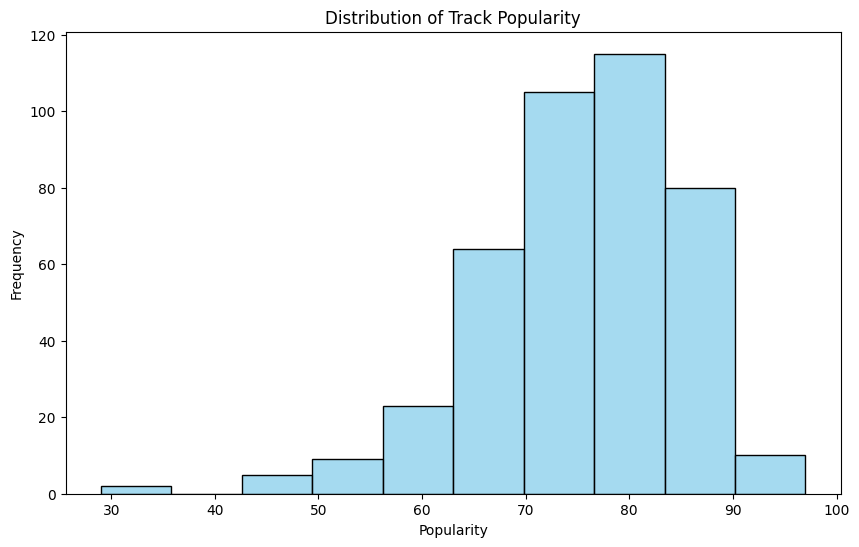

In [ ]:
# Visualisation of popularity among track using histplot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
sns.histplot(df['Popularity'], bins=10, kde=False, color='skyblue')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Track Popularity')

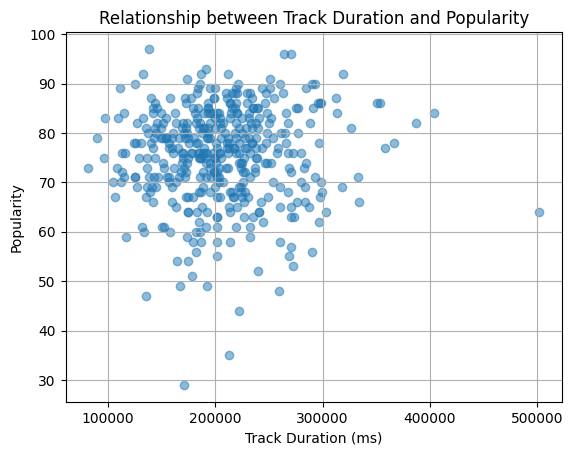

In [37]:
# 3 Is there any relationship between the popularity and the duration of tracks?
#  Explore this using a scatter plot?
plt.scatter(df['Duration (ms)'], df['Popularity'], alpha=0.5)
plt.title('Relationship between Track Duration and Popularity')
plt.xlabel('Track Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()


In [ ]:
# we can see relationship between the popularity and the duration of tracks in the above scatter plot figure 

In [17]:
''' 4 Which artist has the highest number of tracks in the dataset?
 Display the count of tracks for each artist using a countplot.'''

df['track_counts'] = df.groupby('Artist')['Track Name'].count() 

# Find the artist with the highest number of tracks
artist_with_highest_tracks = df['track_counts'].idxmax()
print(f'artist with highest :{artist_with_highest_tracks}')

artist with highest :nan


C:\Users\saura\AppData\Local\Temp\ipykernel_9208\3125793605.py:7: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  artist_with_highest_tracks = df['track_counts'].idxmax()


In [73]:
# Display the count of tracks for each artist using a countplot.

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='track_counts', data=df, palette='viridis')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.title('Count of Tracks for Each Artist')
plt.xticks(rotation=90)
plt.show()



ValueError: Could not interpret value `track_counts` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by artist and sum track counts
artist_track_counts = df.groupby('Artist')['track_counts'].sum().reset_index()

# Sort the artist by track counts if needed (optional)
artist_track_counts = artist_track_counts.sort_values(by='track_counts', ascending=False)

# Create a bar plot for track counts of each artist
plt.figure(figsize=(12, 8))
sns.barplot(x='Artist', y='track_counts', data=artist_track_counts, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Customize plot
plt.xlabel('Artist')
plt.ylabel('Total Number of Tracks')
plt.title('Total Track Count for Each Artist')
plt.show()


KeyError: 'Column not found: track_counts'

In [76]:

# Group by 'Artist' and count occurrences of each 'Track Name'
top_tracks_each_artist = df.groupby('Artist')['Track Name'].value_counts()

# For each artist, get the most frequent track (top track)
top_tracks_each_artist_df = top_tracks_each_artist.groupby(level=0).head(1).reset_index(name='Track Count')

# Display the result as a DataFrame
print(top_tracks_each_artist_df)



                     Artist  \
0                    *NSYNC   
1                  2 Chainz   
2                 21 Savage   
3    A Boogie Wit da Hoodie   
4                 A$AP Ferg   
..                      ...   
110              Young Nudy   
111              Young Thug   
112            benny blanco   
113                   cassö   
114                      ¥$   

                                            Track Name  Track Count  
0                               Better Place (Reunion)            1  
1                           We Own It (Fast & Furious)            1  
2                                              née-nah            2  
3                         Drowning (feat. Kodak Black)            1  
4    Work REMIX (feat. A$AP Rocky, French Montana, ...            1  
..                                                 ...          ...  
110      Peaches & Eggplants (feat. Latto & Sexyy Red)            1  
111         Hot (Remix) [feat. Gunna and Travis Scott]            1

In [75]:
df.head(1)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6


In [18]:
''' 5 What are the top 5 least popular tracks in the dataset?
 Provide the artist name and track name for each?'''
least_popular_tracks = df.sort_values('Popularity', ascending=True).head(5)
print(f'top 5 least_popular_tracks:{least_popular_tracks}')


for index, row in least_popular_tracks.iterrows():
 # artist name and track name for each
    print(f"Artist: {row['Artist']}, Track: {row['Track Name']}") 

top 5 least_popular_tracks:             Artist                     Track Name  Popularity  Duration (ms)  \
207          Pressa  Attachments (feat. Coi Leray)          29         171000   
231   Justin Bieber                     Intentions          35         212853   
413  French Montana                Splash Brothers          44         221863   
435  French Montana                Splash Brothers          44         221863   
225        Lil Baby                  On Me - Remix          47         135444   

                   Track ID  track_counts  
207  6EfJ8Ct3GHbBz2YlyPnMYb           NaN  
231  7jAVt70Xdg8EwOtsFB1ZqK           NaN  
413  3fBsEOnzwtlkpS0LxXAZhN           NaN  
435  3fBsEOnzwtlkpS0LxXAZhN           NaN  
225  2uUFVnVFERNxUdcmvEs7LB           NaN  
Artist: Pressa, Track: Attachments (feat. Coi Leray)
Artist: Justin Bieber, Track: Intentions
Artist: French Montana, Track: Splash Brothers
Artist: French Montana, Track: Splash Brothers
Artist: Lil Baby, Track: On Me - R

In [19]:
'''6. Among the top 5 most popular artists, 
which artist has the highest popularity on average? 
Calculate and display the average popularity for each artist?'''

# Get the top 5 most popular artists based on individual track popularity

top_5_artists = df.sort_values('Popularity', ascending=False)['Artist'].unique()[:5]
top_5_artists

# Calculate average popularity for each of the top 5 artists
average_Popularity = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean()

# Find the artist with the highest average popularity
Artist_with_highest_avg_Popularity = average_Popularity.idxmax()

# Display the average popularity for each artist
print("Average Popularity for Top 5 Artists:")
for Artist, Popularity in average_Popularity.items():
    print(f"Artist: {Artist}, Average Popularity: {Popularity}")

print(f"\nArtist with the highest average popularity: {Artist_with_highest_avg_Popularity}")


Average Popularity for Top 5 Artists:
Artist: 21 Savage, Average Popularity: 84.18181818181819
Artist: Jack Harlow, Average Popularity: 77.71428571428571
Artist: Travis Scott, Average Popularity: 87.0
Artist: cassö, Average Popularity: 92.0
Artist: ¥$, Average Popularity: 86.0909090909091

Artist with the highest average popularity: cassö


In [20]:
'''7 For the top 5 most popular artists, what are their most popular tracks?
List the track name for each artist?'''

import warnings
warnings.filterwarnings('ignore')

# Get the top 5 most popular artists based on individual track popularity
top_5_artists = df.sort_values('Popularity', ascending=False)['Artist'].unique()[:5]
top_5_artists


# Get the most popular track for each of the top 5 artists
most_popular_tracks = df[df['Artist'].isin(top_5_artists)].groupby('Artist').apply(lambda x: x.nlargest(1, 'Popularity'))


# Display the most popular track for each artist
print("Most Popular Tracks for Top 5 Artists:")

for index, row in most_popular_tracks.iterrows():
    print(f"Artist: {row['Artist']}, Track: {row['Track Name']}")

Most Popular Tracks for Top 5 Artists:
Artist: 21 Savage, Track: redrum
Artist: Jack Harlow, Track: Lovin On Me
Artist: Travis Scott, Track: FE!N (feat. Playboi Carti)
Artist: cassö, Track: Prada
Artist: ¥$, Track: CARNIVAL


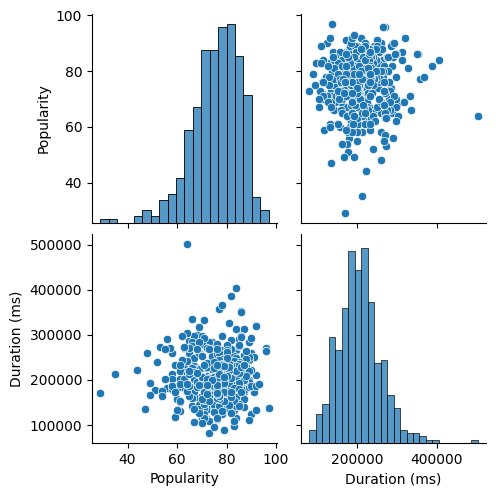

In [76]:
# 8 Visualize relationships between multiple numerical variables simultaneously using a pair plot.
import seaborn as sns
import matplotlib.pyplot as plt
num_value = df.select_dtypes(include=['number'])
num_value
sns.pairplot(data=num_value)
plt.show()


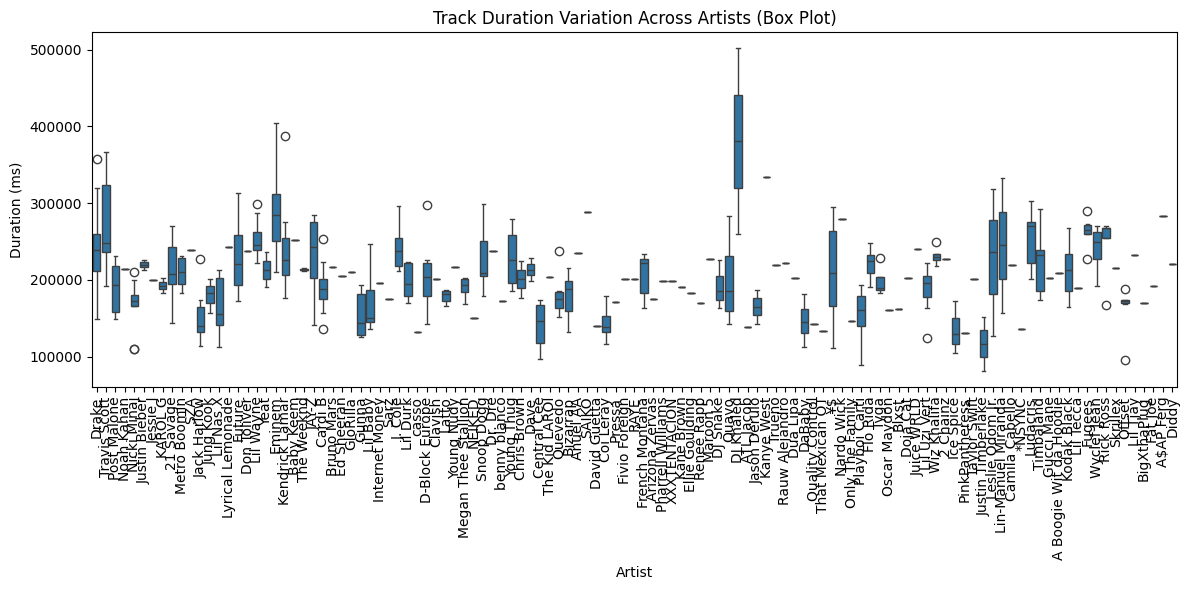

In [27]:
# 9 Does the duration of tracks vary significantly across different artists? 
# Explore this visually using a box plot or violin plot.

 # Create a box plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Track Duration Variation Across Artists (Box Plot)')
plt.tight_layout()
plt.show()

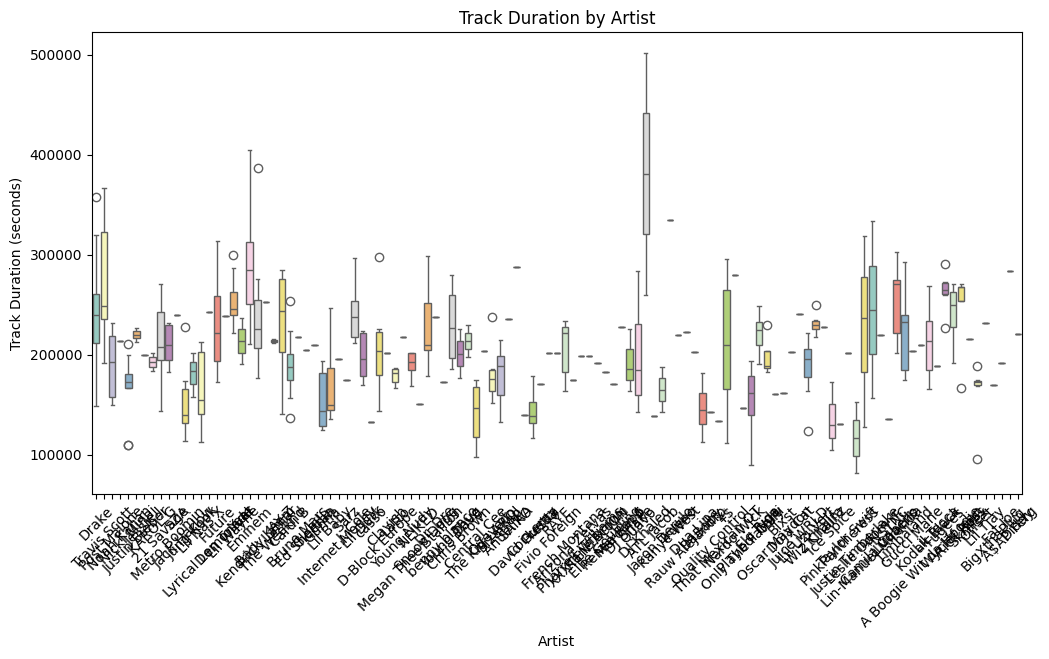

,Artist,Track Name,Popularity,Duration (ms),Track ID,track_counts
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6,NaN
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0,NaN


In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df, palette='Set3')
plt.title('Track Duration by Artist')
plt.xlabel('Artist')
plt.ylabel('Track Duration (seconds)')
plt.xticks(rotation=45)
plt.show()
df.head(2)

In [23]:
df.head(2)

,Artist,Track Name,Popularity,Duration (ms),Track ID,track_counts
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6,NaN
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0,NaN


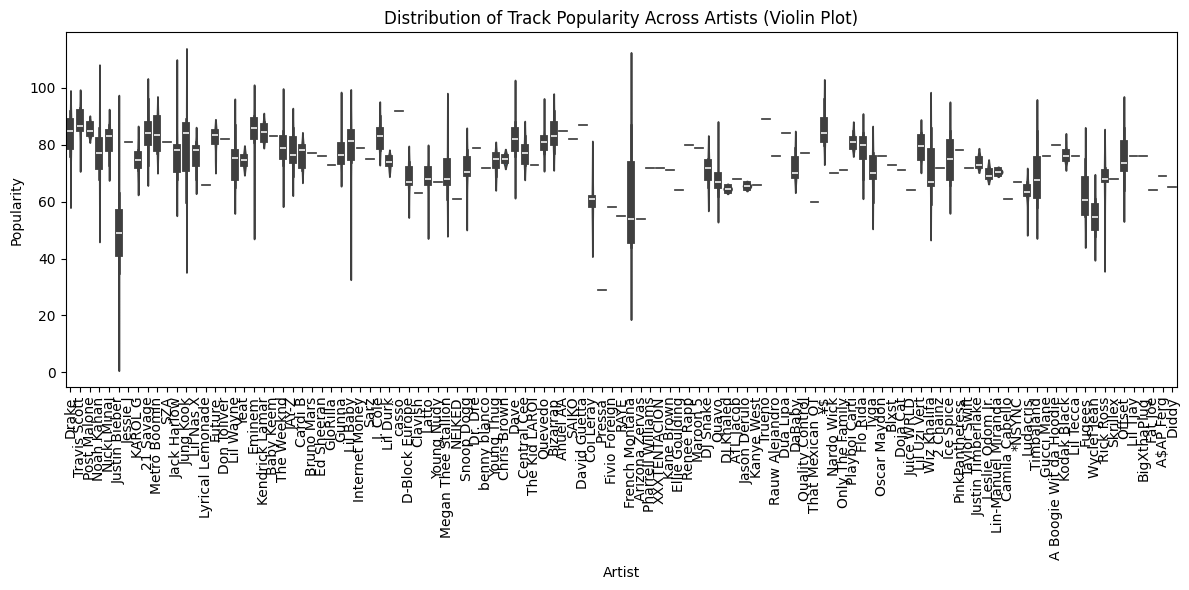

In [28]:
# 10 How does the distribution of track popularity vary for different artists?
# Visualize this using a swarm plot or a violin plot.

#df.groupby('Artist')['Popularity'].idxmax()
# Create a violin plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.violinplot(x='Artist', y='Popularity', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Distribution of Track Popularity Across Artists (Violin Plot)')
plt.tight_layout()
plt.show()

import warnings
warnings.filterwarnings('ignore')
